# (01) Matplotlib:---------------------------------------------------------------------------

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
%matplotlib inline

In [2]:
x = np.linspace(0,5,10)
n = np.array([0,1,2,3,4,5])
xx= np.linspace(-1,1,30)

1-D plots:

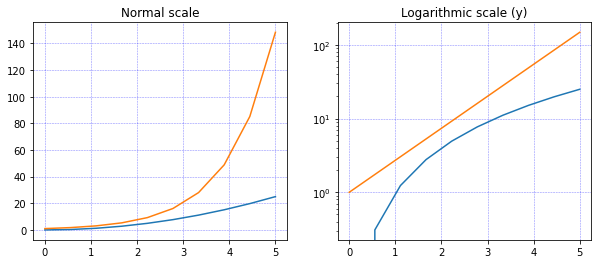

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")
axes[0].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

2-D plots:

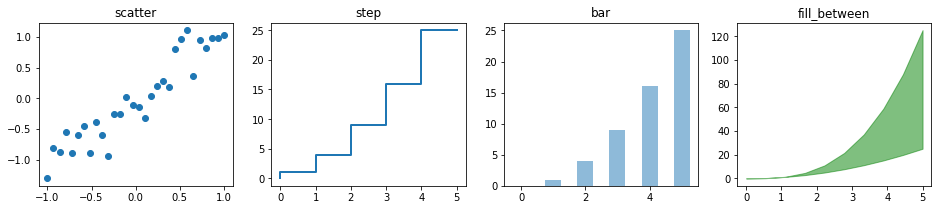

In [4]:
fig, axes = plt.subplots(1, 4, figsize=(16,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

<ipython-input-5-2bc0726499b3>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p  = axes[0].pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())


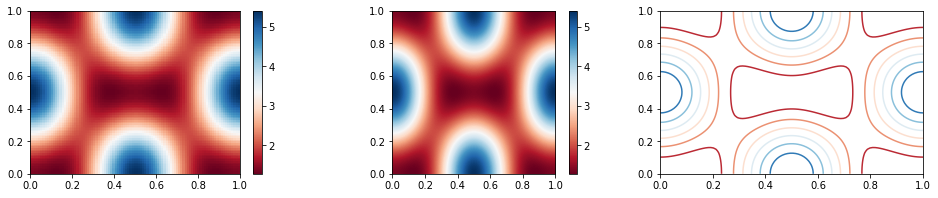

In [5]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

fig, axes = plt.subplots(1, 3, figsize=(16,3))

p  = axes[0].pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=axes[0])

im = axes[1].imshow(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')
cb = fig.colorbar(im, ax=axes[1])

cnt= axes[2].contour(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])

3-D plots:

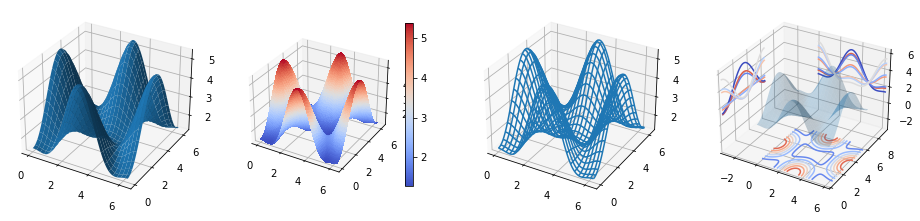

In [6]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(1, 4, 1, projection='3d')
p  = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)
ax = fig.add_subplot(1, 4, 2, projection='3d')
p  = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)
ax = fig.add_subplot(1, 4, 3, projection='3d')
p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)
ax = fig.add_subplot(1,4,4, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=matplotlib.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);


# (02) Seaborn:-----------------------------------------------------------------------------

Titatnic dataset description: http://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf

In [7]:
import seaborn as sns

In [8]:
sns.set_style('whitegrid')
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='class', ylabel='age'>

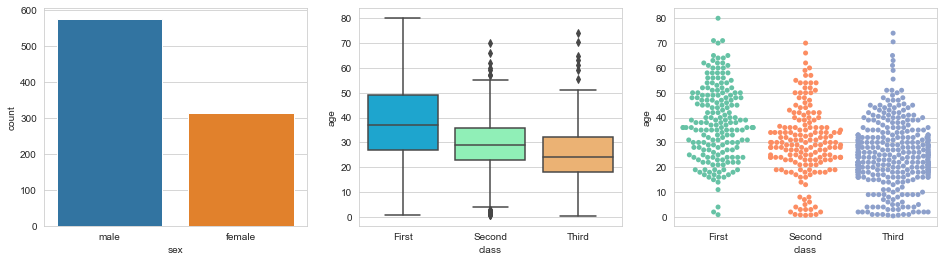

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(16,4))
sns.countplot(ax= axes[0], x='sex',data=titanic)
sns.boxplot(ax= axes[1], x='class',y='age',data=titanic,palette='rainbow')
sns.swarmplot(ax= axes[2], x='class',y='age',data=titanic,palette='Set2')

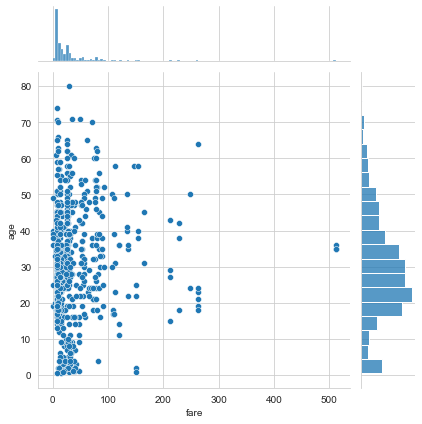

In [10]:
sns.jointplot(x='fare',y='age',data=titanic)

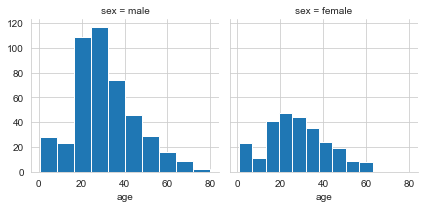

In [11]:
g = sns.FacetGrid(data=titanic,col='sex')
g.map(plt.hist,'age')

Text(0.5, 1.0, 'titanic.corr()')

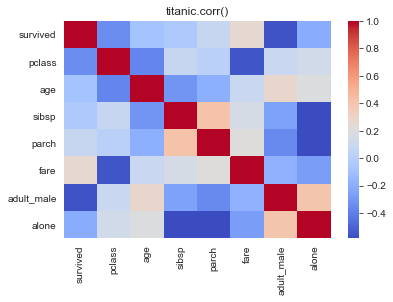

In [12]:
sns.heatmap(titanic.corr(),cmap='coolwarm')
plt.title('titanic.corr()')